In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from collections import Counter


In [2]:
df = pd.read_pickle('dataset_sentimens.pckl')

In [3]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [4]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [5]:
stop_words_german = list()
with open('stopp_wörter_deutsch.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split(','):
   
            # displaying the words           
            stop_words_german.append(word.replace(' ',''))

In [6]:
X = df[cluster_variables].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [7]:
len(df['text'].unique())

6740

In [33]:
df['text'] = df['text'].str.replace('\n',' ')
corpus = df['text']
vectorizer = TfidfVectorizer(stop_words=stop_words_german,
                            strip_accents='unicode',
#                             max_df=0.8,
#                             min_df=100
                            )
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()


X = X.toarray() 

/home/egon/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['daruber', 'daruberhinaus', 'fur', 'gegenuber', 'gemaß', 'grundlich', 'haufig', 'konnen', 'konnt', 'mussen', 'nachste', 'tatsachlich', 'uber', 'uberall', 'voruber', 'wahrend', 'zwischen'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [ ]:
# distortions_euclidean = []
# distortions_minkowski = []
# distortions_cityblock = []
# inertias = []
# mapping1 = {}
# mapping2 = {}
# K = range(1, 10)

# for k in K:
#     # Building and fitting the model
#     kmeanModel = KMeans(n_clusters=k).fit(X)
#     kmeanModel.fit(X)

#     distortions_euclidean.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                         'euclidean'), axis=1)) / X.shape[0])
#     distortions_minkowski.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                         'minkowski'), axis=1)) / X.shape[0])
#     distortions_cityblock.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                         'cityblock'), axis=1)) / X.shape[0])
#     inertias.append(kmeanModel.inertia_)

#     mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                    'euclidean'), axis=1)) / X.shape[0]
#     mapping2[k] = kmeanModel.inertia_
    
#     print(k)


In [ ]:
# for key, val in mapping1.items():
# #     print(f'{key} : {val}')


In [ ]:
# K = range(1,10)
# plt.plot(K, distortions_euclidean, 'bx-')
# plt.plot(K, distortions_minkowski, 'gx-')
# plt.plot(K, distortions_cityblock, 'rx-')
# plt.xlabel('Values of K')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method using Distortion')
# plt.show()


In [ ]:
# for key, val in mapping2.items():
#    print(f'{key} : {val}')

In [ ]:
# plt.plot(K, inertias, 'bx-')
# plt.xlabel('Values of K')
# plt.ylabel('Inertia')
# plt.title('The Elbow Method using Inertia')
# plt.show()

In [37]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
kmeans.labels_

cluster_centers = kmeans.cluster_centers_


In [11]:
cluster_centers[0]

array([-1.08420217e-19,  0.00000000e+00, -1.35525272e-20, ...,
       -2.03287907e-20, -6.77626358e-21, -6.77626358e-21])

In [38]:
np.bincount(kmeans.labels_)

array([ 454,  352, 1269, 1284, 1104,  914,  210,  568,  542,   51])

In [39]:
df['kmeans_label'] = kmeans.labels_

In [41]:
df['neun_euro_context'] = df['neun_euro_context']
df.groupby('kmeans_label').mean().T


kmeans_label,0,1,2,3,4,5,6,7,8,9
index,10991.980176,11082.713068,11212.301024,11419.166667,10933.154891,11513.241794,10096.138095,11441.248239,10656.590406,12578.882353
public_metrics.retweet_count,0.187225,0.204545,0.148148,0.212617,1.088768,0.148796,0.076190,0.077465,0.245387,0.705882
public_metrics.reply_count,0.801762,1.017045,0.816391,0.758567,1.079710,0.950766,0.761905,0.788732,0.968635,0.176471
public_metrics.like_count,2.993392,3.568182,4.972419,3.742991,7.759964,5.358862,2.666667,3.628521,5.544280,2.372549
public_metrics.quote_count,0.008811,0.017045,0.026793,0.016355,0.141304,0.032823,0.028571,0.014085,0.031365,0.019608
is_retweet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
neun_euro_context,0.048458,0.042614,0.055162,0.043614,0.098732,0.068928,0.033333,0.054577,0.059041,0.000000
positive,-1.410725,-1.746616,-1.509783,-1.416367,-1.765937,-1.753096,-1.249478,-1.544370,-1.114799,-2.450433
negative,0.792744,0.749961,0.758188,0.634391,-0.080711,1.202174,1.134490,0.908633,1.130700,1.786850
neutral,1.291123,1.785936,1.445290,1.443824,2.803882,1.276319,0.567546,1.291937,0.431915,1.815401


https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8

In [15]:
df['text'] = df['text'].str.replace('\n',' ')

In [16]:
df[df['kmeans_label']==0]

,index,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,...,is_retweet,created_at_day,neun_euro_context,text_altered,sentiments,positive,negative,neutral,created_at_week,kmeans_label
14,79,"@horatiorama @sixtus Kann durchaus sein, wenn ...",1518363511503695876,0,0,1,0,de,2022-04-24T22:57:25.000Z,1518306274273906689,...,0,2022-04-24,False,"Kann durchaus sein, wenn die Anschlüsse nich...",negative,-1.558217,1.390601,1.083046,16,0
72,241,"@sixtus Straßenbahn, S-Bahn, Fahrrad. Kein Aut...",1518878695649574912,0,1,1,0,de,2022-04-26T09:04:35.000Z,1518848105042612231,...,0,2022-04-26,False,"Straßenbahn, S-Bahn, Fahrrad. Kein Auto notwe...",neutral,-1.790594,-0.425833,3.166624,17,0
107,335,"#Pendeln 10 min Fahrrad, (Bahn verpasst😰😡) 27 ...",1519018782047588352,0,0,0,0,de,2022-04-26T18:21:14.000Z,1519018782047588352,...,0,2022-04-26,False,"#Pendeln 10 min Fahrrad, (Bahn verpasst😰😡) 27 ...",neutral,-1.981755,1.378953,1.770186,17,0
242,652,@Crownen187 Also ich gehe mit Fahrrad in den B...,1519646225389301762,0,2,2,0,de,2022-04-28T11:54:28.000Z,1519590363517927426,...,0,2022-04-28,False,Also ich gehe mit Fahrrad in den Bus oder den...,neutral,-1.636816,-0.560548,2.956519,17,0
252,678,Werdet Ihr das 9 Euro-Ticket nutzen? Ich übe...,1519674350437285888,0,9,24,0,de,2022-04-28T13:46:13.000Z,1519674350437285888,...,0,2022-04-28,True,Werdet Ihr das 9 Euro-Ticket nutzen? \n\nIch ü...,neutral,-2.187249,-0.256239,3.599052,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,20635,"@Kanasowas das ist schön für dich, dass es bei...",1548391587859685377,0,0,0,0,de,2022-07-16T19:38:16.000Z,1547840028931330048,...,0,2022-07-16,False,"das ist schön für dich, dass es bei dir mitm ...",negative,-0.170417,1.088732,-0.516788,28,0
6394,21094,"@mjaschy @PHPmacher 18km #Arbeitsweg, eine Str...",1549669181414674432,0,0,1,0,de,2022-07-20T08:14:58.000Z,903577973382672384,...,0,2022-07-20,False,"18km #Arbeitsweg, eine Strecke:\n- #KFZ 25-3...",negative,-1.804216,2.559833,-0.244818,29,0
6430,21151,#9EuroTicket - #halbzeit : ich kann ganz siche...,1549723602227961857,0,0,1,0,de,2022-07-20T11:51:13.000Z,1549723602227961857,...,0,2022-07-20,True,#9EuroTicket - #halbzeit : ich kann ganz siche...,negative,-2.093665,4.333275,-2.240513,29,0
6559,21492,Ihr mögt #9EuroTicket-#Geschichten? Seid #LIVE...,1550121510848761857,3,5,30,1,de,2022-07-21T14:12:22.000Z,1550121510848761857,...,0,2022-07-21,True,Ihr mögt #9EuroTicket-#Geschichten? Seid #LIVE...,negative,-2.097706,3.518393,-1.236384,29,0


In [ ]:
df_hashtags = pd.DataFrame()
for k in range(100):
    df_tmp = pd.DataFrame()
    df_tmp_2 = pd.DataFrame()
    df_tmp['hastag_list'] = df[df.kmeans_label == k].text.str.findall(r'#.*?(?=\s|$)')
    df_tmp['number_hastags'] = df_tmp['hastag_list'].apply(lambda x: len(x))
    df_tmp = df_tmp[df_tmp.number_hastags != 3]
    hashtags = list()
    for i, row in df_tmp.iterrows():
        hashtags += row['hastag_list']
    hashtag_dict = Counter([s.translate(str.maketrans('', '', string.punctuation)) for s in hashtags])
    tmp_dict = {k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1], reverse=True)}
    df_tmp_2 = df_tmp_2.from_dict(tmp_dict, orient='index', dtype=None, columns=None).reset_index()
    df_tmp_2['cluster'] = k
    df_hashtags = pd.concat([df_hashtags,df_tmp_2])

In [ ]:
df.kmeans_label

In [ ]:
df_hashtags.to_csv('output.csv')

In [ ]:
df[['kmeans_label','neun_euro_context', 'positive', 'negative', 'neutral', 'text']].to_csv('output.csv')

In [ ]:
df[~df.neun_euro_context][['positive', 'negative', 'neutral']].mean()

In [ ]:
df[df.neun_euro_context][['positive', 'negative', 'neutral']].mean()

<AxesSubplot:xlabel='negative', ylabel='positive'>

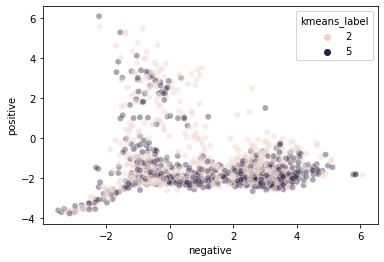

In [42]:
import seaborn as sns
from matplotlib.colors import to_rgba
sns.scatterplot(data=df[df.kmeans_label.isin([2,5])], x="negative", y="positive", hue="kmeans_label", alpha=0.4)
# , style="time"


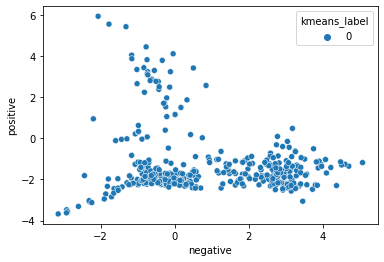

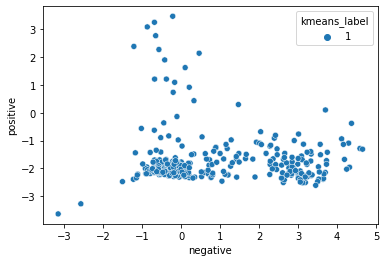

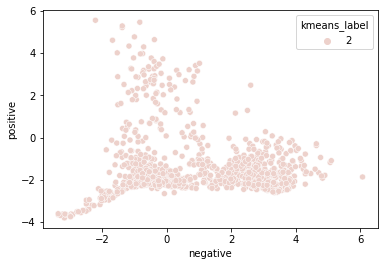

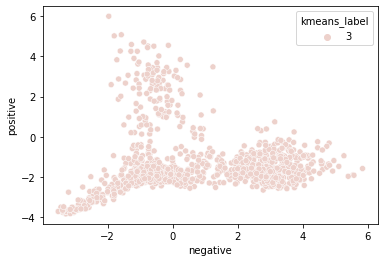

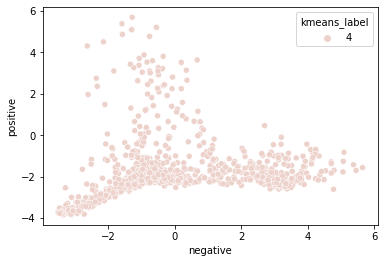

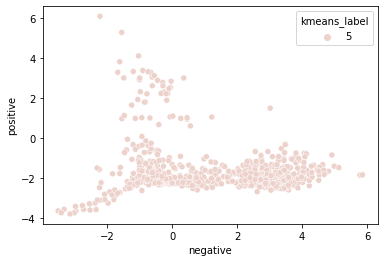

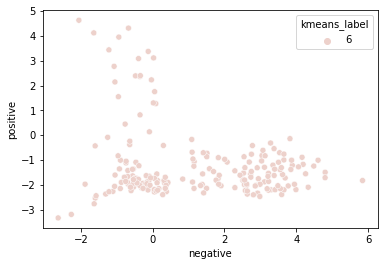

In [43]:
for i in range(7):
    plt.figure()
    sns.scatterplot(data=df[df.kmeans_label.isin([i])], x="negative", y="positive", hue="kmeans_label", alpha=1)

In [47]:
np.bincount(kmeans.labels_)

array([ 454,  352, 1269, 1284, 1104,  914,  210,  568,  542,   51])

In [48]:
df.groupby('kmeans_label').mean().T

kmeans_label,0,1,2,3,4,5,6,7,8,9
index,10991.980176,11082.713068,11212.301024,11419.166667,10933.154891,11513.241794,10096.138095,11441.248239,10656.590406,12578.882353
public_metrics.retweet_count,0.187225,0.204545,0.148148,0.212617,1.088768,0.148796,0.076190,0.077465,0.245387,0.705882
public_metrics.reply_count,0.801762,1.017045,0.816391,0.758567,1.079710,0.950766,0.761905,0.788732,0.968635,0.176471
public_metrics.like_count,2.993392,3.568182,4.972419,3.742991,7.759964,5.358862,2.666667,3.628521,5.544280,2.372549
public_metrics.quote_count,0.008811,0.017045,0.026793,0.016355,0.141304,0.032823,0.028571,0.014085,0.031365,0.019608
is_retweet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
neun_euro_context,0.048458,0.042614,0.055162,0.043614,0.098732,0.068928,0.033333,0.054577,0.059041,0.000000
positive,-1.410725,-1.746616,-1.509783,-1.416367,-1.765937,-1.753096,-1.249478,-1.544370,-1.114799,-2.450433
negative,0.792744,0.749961,0.758188,0.634391,-0.080711,1.202174,1.134490,0.908633,1.130700,1.786850
neutral,1.291123,1.785936,1.445290,1.443824,2.803882,1.276319,0.567546,1.291937,0.431915,1.815401


In [50]:
words = vectorizer.get_feature_names()


In [34]:
type(X)

numpy.ndarray

In [51]:
sum_a = X[list(df[df.kmeans_label==1].index)].sum(axis=0)
nd = np.argpartition(sum_a, -10)[-10:]
for i in nd:
    print(words[i])

dich
dir
bus
zug
dein
fahrst
rad
nicht
du
fahrrad


In [52]:
sum_a.shape

(25866,)

In [53]:
vectorizer.stop_words_

set()